In [1]:
import json

# Load the dataset
with open("/Users/nguyenbathiem/Documents/GitHub/StockBot/StockBot/data/splitted_news.json", 'r') as file:
    news_data = json.load(file)

# Show the first few records to understand the structure
news_data[:5]


[{'URL': 'https://www.dnse.com.vn/senses/tin-tuc/cong-ty-so-huu-cuoc-thi-hoa-hau-hoan-vu-quoc-te-vo-no-33422332',
  'Publish Time': '2023-09-19T02:54:00',
  'News ID': 33422332,
  'Splitted Content': 'Các vụ vỡ nợ trái phiếu doanh nghiệp đang tăng ở Thái Lan. Ngân hàng Trung ương tăng lãi suất đã làm tăng chi phí tài chính của doanh nghiệp và gây khó khăn cho một số tổ chức phát hành trong việc đảm bảo số tiền họ cần để trả nợ. Các tổ chức phát hành trái phiếu cũng đang gặp khó khăn bởi sự thận trọng ngày càng tăng của các nhà đầu tư đối với việc mua trái phiếu không được đảm bảo bằng tài sản thế chấp. Ông Kasem Prunratanamala, trưởng bộ phận nghiên cứu của CGS-CIMB Securities (Thái Lan), phát biểu: “Các vụ vỡ nợ trái phiếu gần đây của nhiều doanh nghiệp đã làm giảm lòng tin trên thị trường, dẫn đến giá trị giao dịch trái phiếu giảm”. Theo hiệp hội Thị trường Trái phiếu Thái Lan, 7 công ty niêm yết đã trễ thời hạn mua lại tính đến ngày 31/8. Tổng số nợ của 7 công ty này là 19 tỷ baht. 

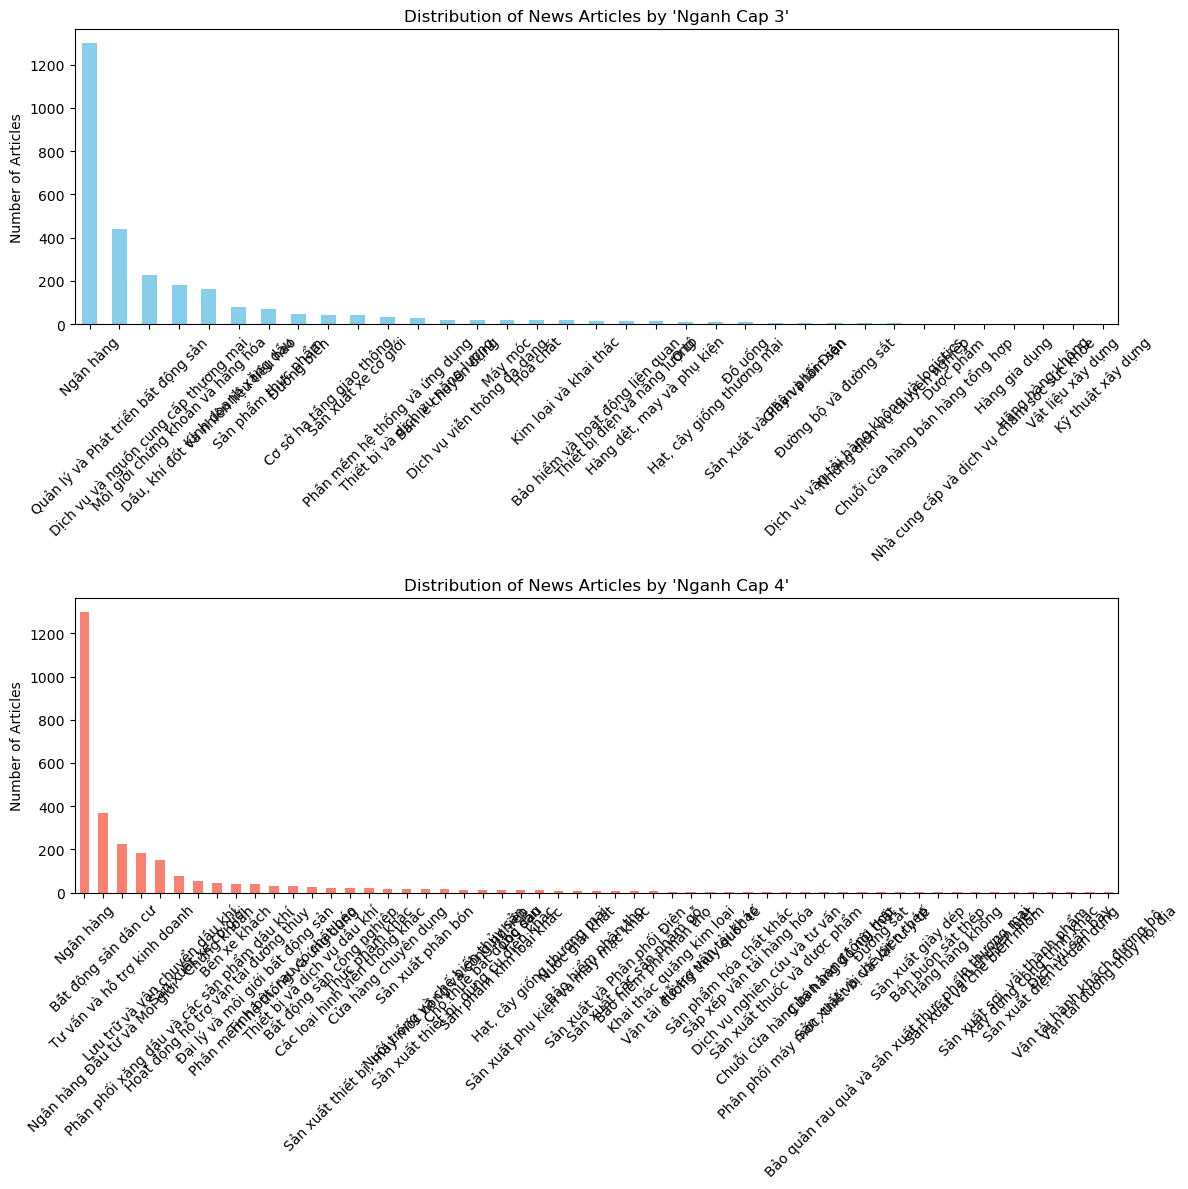

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the data to a DataFrame for easier analysis
news_df = pd.DataFrame(news_data)

# Get distribution for 'Nganh Cap 3' and 'Nganh Cap 4'
nganh_cap_3_distribution = news_df['Nganh Cap 3'].value_counts()
nganh_cap_4_distribution = news_df['Nganh Cap 4'].value_counts()

# Visualize the distributions
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Plot for 'Nganh Cap 3'
nganh_cap_3_distribution.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title("Distribution of News Articles by 'Nganh Cap 3'")
ax[0].set_ylabel('Number of Articles')
ax[0].tick_params(axis='x', rotation=45)

# Plot for 'Nganh Cap 4'
nganh_cap_4_distribution.plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title("Distribution of News Articles by 'Nganh Cap 4'")
ax[1].set_ylabel('Number of Articles')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all the news content into a single string
text = ' '.join(news_df['Splitted Content'])

# Set up stopwords (common words to be excluded)
stopwords = set(STOPWORDS)
stopwords.update(["được", "của", "và", "các", "là", "trong", "đã", "cho", "với", "không", "người", "có", "ở", "một", "như", "để", "từ", "này", "khi", "đến", "nên", "này", "ra", "đó", "bị", "thì"])

# Generate a word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=600, max_words=100, contour_width=3, contour_color='steelblue').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for News Content")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import json
# Load the JSON data from the provided file
with open("/Users/nguyenbathiem/Documents/GitHub/StockBot/StockBot/data/splitted_news.json", "r") as file:
    data = json.load(file)


# Extract the 'Splitted Content' from the data
contents = [item['Splitted Content'] for item in data]
# Convert contents to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(contents)

# Compute the pairwise cosine similarities
cosine_similarities = cosine_similarity(tfidf_matrix)

# Since cosine_similarity returns a symmetric matrix and the diagonal is 1 (since a content is always 100% similar to itself), 
# we will mask the upper triangular part including the diagonal to avoid duplicate pairs and self-pairs.
mask = np.triu(np.ones_like(cosine_similarities, dtype=bool))
cosine_similarities[mask] = 0

# Find the pair of contents with the highest similarity
content_pair_indices = np.unravel_index(np.argmax(cosine_similarities, axis=None), cosine_similarities.shape)
similarity_value = cosine_similarities[content_pair_indices]

content_pair_indices, similarity_value

In [ ]:
# Get the indices and values of the top 10 similarities
topindices = np.dstack(np.unravel_index(np.argsort(-cosine_similarities.ravel()), cosine_similarities.shape))[0][:]
topvalues = np.sort(cosine_similarities.ravel())[:][::-1]

toppairs = [(index_pair, value) for index_pair, value in zip(topindices, topvalues) if value >= 0.8945]

len(toppairs)


In [ ]:
# Extracting the contents of the top 10 similar pairs
topcontent_pairs = [(contents[index_pair[0]], contents[index_pair[1]], _) for index_pair, _ in toppairs]

topcontent_pairs



In [ ]:
duplicate = [contents[index_pair[1]] for index_pair,_ in toppairs]
duplicate

In [ ]:
output_file_path = "/Users/nguyenbathiem/Documents/GitHub/StockBot/StockBot/data/cleaned_splitted_news.json"
cleaned_data = [d for d in news_data if d['Splitted Content'] not in duplicate ]

with open(output_file_path, "w") as file:
    json.dump(cleaned_data, file)


# Visualize basic document in community detection

In [1]:
import json
output_file_path = "/Users/nguyenbathiem/Documents/GitHub/StockBot/StockBot/data/cleaned_splitted_news.json"
with open(output_file_path, "r") as file:
    data = json.load(file)
len(data)

2768

In [2]:
content = [item['Splitted Content'] for item in data]
content[:5]

['Các vụ vỡ nợ trái phiếu doanh nghiệp đang tăng ở Thái Lan. Ngân hàng Trung ương tăng lãi suất đã làm tăng chi phí tài chính của doanh nghiệp và gây khó khăn cho một số tổ chức phát hành trong việc đảm bảo số tiền họ cần để trả nợ. Các tổ chức phát hành trái phiếu cũng đang gặp khó khăn bởi sự thận trọng ngày càng tăng của các nhà đầu tư đối với việc mua trái phiếu không được đảm bảo bằng tài sản thế chấp. Ông Kasem Prunratanamala, trưởng bộ phận nghiên cứu của CGS-CIMB Securities (Thái Lan), phát biểu: “Các vụ vỡ nợ trái phiếu gần đây của nhiều doanh nghiệp đã làm giảm lòng tin trên thị trường, dẫn đến giá trị giao dịch trái phiếu giảm”. Theo hiệp hội Thị trường Trái phiếu Thái Lan, 7 công ty niêm yết đã trễ thời hạn mua lại tính đến ngày 31/8. Tổng số nợ của 7 công ty này là 19 tỷ baht. Con số này nhiều hơn 6 vụ vỡ nợ với tổng trị giá 13,5 tỷ baht xảy ra trong giai đoạn 2016 - 2022.',
 'Khó khăn đang bao trùm nhiều tập đoàn Thái Lan, từ nhà phát triển bất động sản tới các công ty đi

In [3]:
from model_bkai import model
import numpy as np
result_array = np.empty((0, 768))


# Loop through the list of vectors and append them to the result array
for sentence in content[:100]:
    vector = model.encode(sentence)
    # Convert the vector to a NumPy array and reshape it to be a row vector
    vector_array = vector.reshape(1, -1)
    
    # Append the vector to the result array
    result_array = np.vstack((result_array, vector_array))

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [4]:
result_array
file_path = 'result_array.npy'
# Save the array to the file
np.save(file_path, result_array)

In [5]:

file_path = 'result_array.npy'

# Load the array from the file
loaded_array = np.load(file_path)

loaded_array

array([[-0.00640782,  0.07213394,  0.0204429 , ...,  0.09438846,
         0.16521424,  0.07218707],
       [ 0.10721716,  0.12467602,  0.15426169, ...,  0.06342383,
         0.19826734,  0.0688795 ],
       [ 0.15115356,  0.12547554, -0.01873292, ...,  0.17360096,
         0.1024076 ,  0.19579898],
       ...,
       [ 0.03602058,  0.21554336, -0.09985988, ...,  0.26770639,
         0.02935778,  0.2468189 ],
       [-0.0621909 ,  0.01937138, -0.19943868, ...,  0.15629221,
         0.05903662,  0.22651824],
       [ 0.05141718, -0.00384625, -0.07628442, ...,  0.23705384,
         0.09874872,  0.10235962]])

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from ipywidgets import interact

In [7]:
# Perform PCA for dimensionality reduction
n_components = 3  # You can adjust the number of components as needed
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(loaded_array)
data_pca


array([[-0.45013975,  1.38903727, -0.62908694],
       [-0.13675241,  1.84304262, -0.70855153],
       [-0.46173554,  1.70986193, -0.82137747],
       [-1.43368888,  0.71410164, -0.90859556],
       [-1.0874533 ,  0.95560558, -0.79169959],
       [-0.64470751,  1.57275411, -0.54368795],
       [-0.90643238,  1.65711344, -0.53876649],
       [ 0.16511071,  1.8275608 , -0.56653951],
       [ 0.64969383,  1.34513131,  0.07305146],
       [-0.47602689, -0.69933424, -1.36877822],
       [-0.41061287, -0.83867456, -1.89143186],
       [-1.02358082, -0.22062241, -0.91199284],
       [ 0.36485424,  0.62525838, -1.01966234],
       [ 3.4253948 , -0.14969737, -1.78660106],
       [ 2.72249229,  0.51013588, -1.59507982],
       [ 3.11712224,  0.10671873, -1.29884309],
       [ 2.64236416,  0.11936565, -1.24650257],
       [ 3.84409673, -1.05923969, -2.03089125],
       [ 3.64902717, -0.40280007, -2.08749836],
       [ 3.87212078, -0.35024772, -2.05129096],
       [ 2.41222987,  0.1041094 , -1.340

In [9]:
# Apply K-means clustering
n_clusters = 8  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42, max_iter=100, init='k-means++', n_jobs=-1)
data_labels = kmeans.fit_predict(data_pca)


TypeError: KMeans.__init__() got an unexpected keyword argument 'n_jobs'

In [12]:
from joblib import Parallel, delayed
n_clusters = 8
def fit_kmeans(data):
    kmeans.fit(data)
    return kmeans.inertia_  # Calculate the inertia for this run

# Run K-means 10 times in parallel and collect inertia values
inertia_values = Parallel(n_jobs=-1)(delayed(fit_kmeans)(data_pca) for _ in range(10))

# Choose the best clustering result based on the lowest inertia
best_kmeans = KMeans(n_clusters=n_clusters, random_state=42, max_iter=100, init='k-means++')
best_kmeans.fit(data_pca)

In [ ]:
df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(n_components)])
# df['Cluster'] = data_labels
df['Cluster'] = best_labels


In [ ]:
def plot_3d_scatter(elevation, azimuth):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    x = np.array(df['PC1'])  # Update with your PCA components
    y = np.array(df['PC2'])  # Update with your PCA components
    z = np.array(df['PC3'])  # Update with your PCA components

    ax.scatter(x, y, z, marker="s", c=df["Cluster"], s=40, cmap="RdBu", alpha=0.7)

    ax.view_init(elev=elevation, azim=azimuth)
    
    # Calculate maximum values from the data
    max_x = np.max(x) + 5 
    max_y = np.max(y) + 5
    max_z = np.max(z) + 5
    
    # Set axis limits based on maximum values
    ax.set_xlim(0, max_x)
    ax.set_ylim(0, max_y)
    ax.set_zlim(0, max_z)
    
    plt.show()

# Create an interactive widget to change the perspective
widget = interact(plot_3d_scatter, elevation=(0, 90, 5), azimuth=(0, 360, 5))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

# Create random data
np.random.seed(0)
v = result_pca
new_column = np.random.rand(v.shape[0], 1)

# Add the new column to 'result_pca' horizontally
v = np.hstack((v, new_column))
df = pd.DataFrame(v, columns=['Feature1', 'Feature2', 'Feature3', "Cluster"])

def plot_3d_scatter(elevation, azimuth):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    x = np.array(df['Feature1'])
    y = np.array(df['Feature2'])
    z = np.array(df['Feature3'])

    ax.scatter(x, y, z, marker="s", c=df["Cluster"], s=40, cmap="RdBu", alpha=1)

    ax.view_init(elev=elevation, azim=azimuth)
    
    # Calculate maximum values from the data
    max_x = np.max(x)
    max_y = np.max(y)
    max_z = np.max(z)
    
    # Set axis limits based on maximum values
    ax.set_xlim(0, max_x+5)
    ax.set_ylim(0, max_y+5)
    ax.set_zlim(0, max_z+5)
    
    plt.show()

# Create an interactive widget to change the perspective
widget = interact(plot_3d_scatter, elevation=(0, 90, 5), azimuth=(0, 360, 5))
